In [38]:
#Importing main libraries and additional libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os

In [39]:
start_data=pd.read_csv('dataset.csv') #Starting the data by locating the file
print(start_data)

        Type                                            Message
0     normal  Go until jurong point, crazy.. Available only ...
1     normal                      Ok lar... Joking wif u oni...
2       spam  Free entry in 2 a wkly comp to win FA Cup fina...
3     normal  U dun say so early hor... U c already then say...
4     normal  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567    spam  This is the 2nd time we have tried 2 contact u...
5568  normal               Will ü b going to esplanade fr home?
5569  normal  Pity, * was in mood for that. So...any other s...
5570  normal  The guy did some bitching but I acted like i'd...
5571  normal                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [40]:
#Replacing the null values into null strings
main_data = start_data.where((pd.notnull(start_data)),'')

In [41]:
main_data.head() #Revealing the content of csv file

,Type,Message
0,normal,"Go until jurong point, crazy.. Available only ..."
1,normal,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,normal,U dun say so early hor... U c already then say...
4,normal,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
main_data.shape #Rows and columns

(5572, 2)

In [43]:
main_data.loc[main_data['Type'] == 'spam', 'Type',] = 0 #Setting spam messages as false
main_data.loc[main_data['Type'] == 'normal', 'Type',] = 1 #Setting normal messages as true

In [44]:
x = main_data['Message'] #Setting x as messages

y = main_data['Type'] #Setting y as categories

In [45]:
print(x) #Printing messages

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [46]:
print(y) #Printing types

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Type, Length: 5572, dtype: object


In [47]:
main_data.groupby('Type').describe()

Message                                                               
       count unique                                                top freq
Type                                                                       
0        747    641  Please call our customer service representativ...    4
1       4825   4516                             Sorry, I'll call later   30

In [48]:
main_data['length']=main_data['Message'].apply(len)
main_data.head()

,Type,Message,length
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


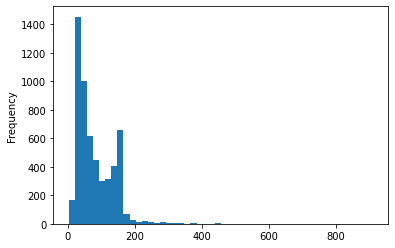

In [49]:
#Plotting length of dataset
main_data['length'].plot(bins=50,kind='hist')

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [51]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5572,)
(4457,)
(1115,)


In [52]:
main_data['Type'].value_counts()

1    4825
0     747
Name: Type, dtype: int64

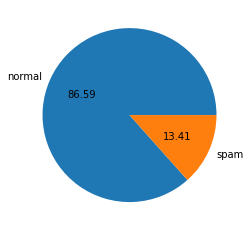

In [53]:
plt.pie(main_data['Type'].value_counts(), labels=['normal','spam'],autopct="%0.2f")
plt.show()

In [54]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
#Amount of characters
main_data['num_chars'] = main_data['Message'].apply(len)

In [56]:
#Amount of word
main_data['num_words'] = main_data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [57]:
#Amount of sentences
main_data['num_sents'] = main_data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [58]:
#Revealing amount of characters, words and sentences among normal
main_data[main_data['Type'] == 1][['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,4825.000000,4825.000000,4825.000000
mean,71.463005,17.421347,1.814922
std,58.448862,14.118974,1.331289
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,910.000000,220.000000,28.000000


In [59]:
#Revealing data about characters, words and sentences among spam
main_data[main_data['Type'] == 0][['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,747.000000,747.000000,747.000000
mean,138.013387,27.878179,3.025435
std,29.993964,7.036282,1.543175
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


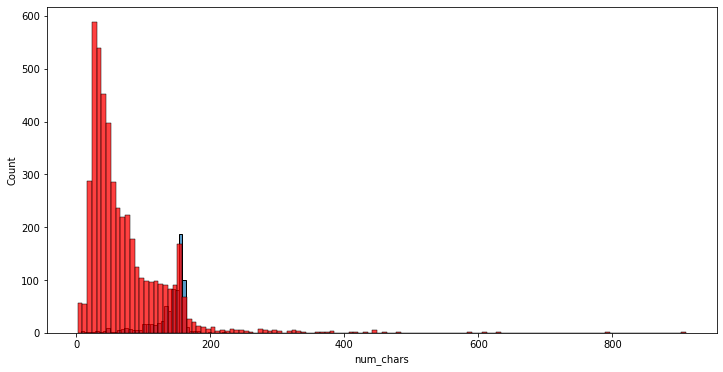

In [60]:
#Plotting amount of characters
plt.figure(figsize=(12,6))
sns.histplot(main_data[main_data['Type'] == 0]['num_chars'])
sns.histplot(main_data[main_data['Type'] == 1]['num_chars'],color='red')

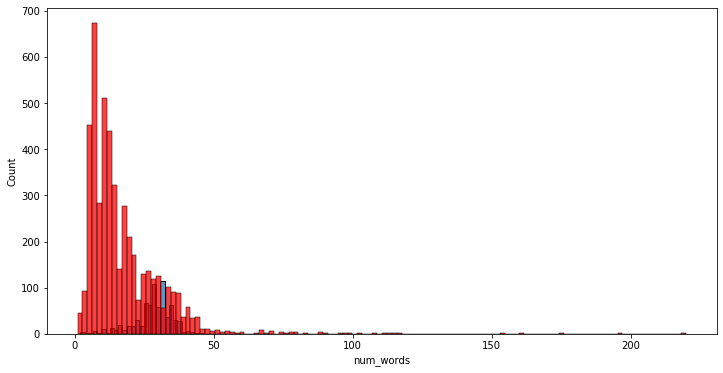

In [61]:
#Plotting amount of words
plt.figure(figsize=(12,6))
sns.histplot(main_data[main_data['Type'] == 0]['num_words'])
sns.histplot(main_data[main_data['Type'] == 1]['num_words'],color='red')

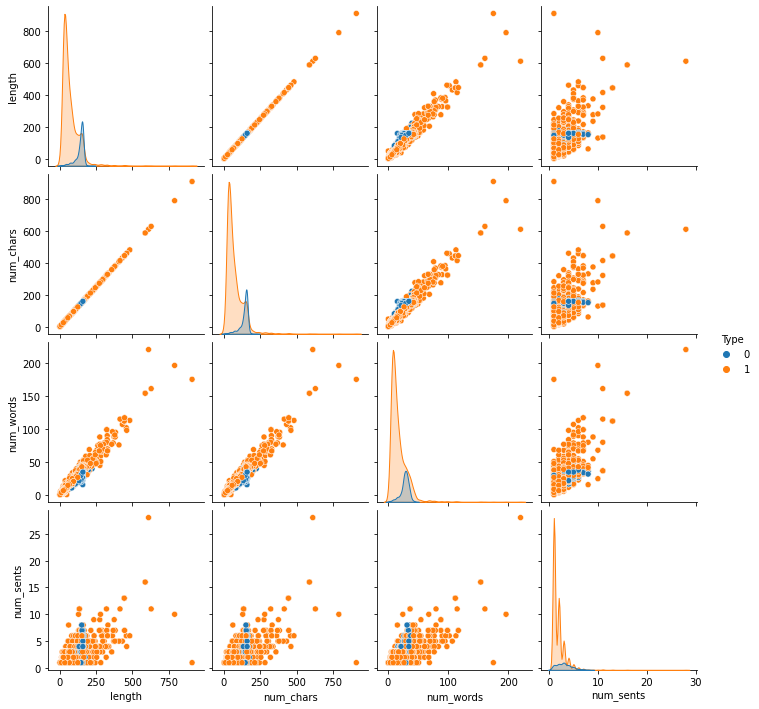

In [62]:
#Plotting all characteristics
sns.pairplot(main_data,hue='Type')

In [63]:
#Converting text data to vectors that will serve as inputs for LogisticRegression
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

#Convert y_train and y_test as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [64]:
print(x_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [65]:
print(x_train_features)

  (0, 5412)	0.6198254967574347
  (0, 4453)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3808)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4077)	0.18880584110891163
  (1, 3182)	0.29694482957694585
  (1, 3322)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3808)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6600)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7413)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5496)	0.15743785051118356
  :	:
  (4454, 4599)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5645)	0.33545678464631296
  (4455, 6809)	0.29731757715898277
  (4

In [66]:
model = LogisticRegression() #Setting LogisticRegression

In [67]:
#Training LogisticRegression with trained data
model.fit(x_train_features, y_train)

LogisticRegression()

In [68]:
#Prediction and accuracy on the training data
train_pred_data = model.predict(x_train_features)
train_acc_data = accuracy_score(y_train, train_pred_data)

In [69]:
print('Accuracy on training data : ', train_acc_data)

Accuracy on training data :  0.9670181736594121


In [70]:
#Prediction and accuracy on testing data
test_pred_data = model.predict(x_test_features)
test_acc_data = accuracy_score(y_test, test_pred_data)

In [71]:
print('Accuracy on test data : ', test_acc_data)

Accuracy on test data :  0.9659192825112107


In [72]:
input_mail = ["Don know. I did't msg him recently."]

#Convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

#Making prediction

prediction = model.predict(input_data_features)
print(prediction)

#Setting is this message Normal or Spam

if (prediction==1):
  print('Normal message')

else:
  print('Spam message')

[1]
Normal message
